In [4]:
import os
import sys
from pathlib import Path

# module_path = os.path.abspath(os.path.join('../'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

In [9]:
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from pathlib import Path
from tqdm import tqdm
from glob import glob

sys.path.append("code/preprocessing/utils/")
from segment2D import *
from segment3D import *
from file_handling import *
# from src.ImUtils import *
# from src.PlottingFunctions import *


In [10]:
vox_to_um = get_voxel_size_35mm()
pix_to_um = get_pixel_size()

139


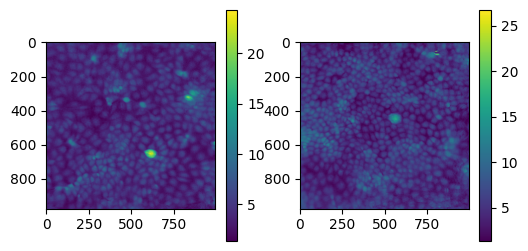

In [159]:
#path = "../../../data/raw/tomocube_20250904_B1"
path = "data/experimental/raw/holomonitor_20240301_B1-4"

fmin=151
fmax=289

#path = "data_tmp/Well_A2-1_zero_corr"
# #mask = imageio.v2.imread(f"data/experimental/raw/holomonitor_20240516_A2-1/mask.tiff")
# im = []
# for f in range(1, 200):

#     #frame = imageio.v2.imread(f"{path}/MDCK-li_reg_zero_corr_fluct_{f}.tiff")
#     frame = imageio.v2.imread(f"{path}/Well A2-1 _reg__Zc0fluct_{f}.tiff")# * (mask > 0)
#     im.append(frame / 100)

# import data
microscope = Path(path).stem.split("_")[0]

if microscope == 'holomonitor':
    pix_to_um = get_pixel_size()
    im = import_holomonitor_stack(path, 
                                    f_min=fmin,
                                    f_max=fmax)

elif microscope == 'tomocube':
    pix_to_um = get_voxel_size_35mm()
    im, h_im = import_tomocube_stack(path, 
                                       h_scaling=vox_to_um[0], 
                                       f_min=fmin, 
                                       f_max=fmax)

# # Tomocube
# fmin = 1
# fmax = 40
# file = "250611.151310.MDCK-parental.001.1per7_5.B3.T001P02"
# folder = "../data/Tomocube/MDCK_11.06.2025/B3P2"
# im, _ = import_tomocube_stack(folder, file, vox_to_um[0], f_min=fmin, f_max=fmax)


fig, ax = plt.subplots(1,2, figsize=(6, 3))
im0 = ax[0].imshow(im[0],  vmin=1.37)
im1 = ax[1].imshow(im[-1], vmin=1.37)

fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
print(len(im))

#im = im[:, 250:750, 250:750]

In [271]:
idx = 48

if microscope == 'holomonitor':
    s_high_tmp = 7
    s_low_tmp  = 12

if microscope == 'tomocube':
    s_high_tmp = 20
    s_low_tmp  = 1.1*s_high_tmp


# im_blur = np.copy(im[idx])
# im_tmp  = np.copy(im[idx])
# im_blur[im_blur < 1.33] = 1.37#np.mean(im_blur)
# im_blur = sc.ndimage.gaussian_filter(im_blur, 40)

# im_tmp[im_tmp < 1.33] = im_blur[im_tmp < 1.33]
# plt.imshow(im_tmp)

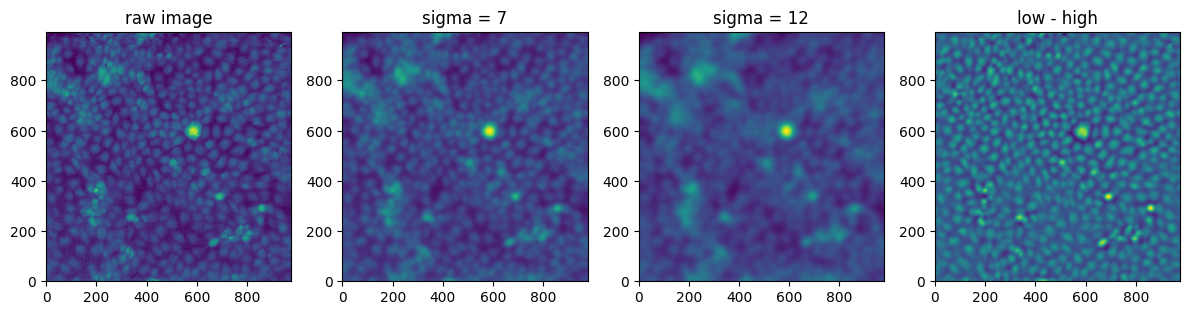

In [272]:
n_gauss = smoothen_normalize_im(im[idx], s_high_tmp, s_low_tmp, fig=True)

438


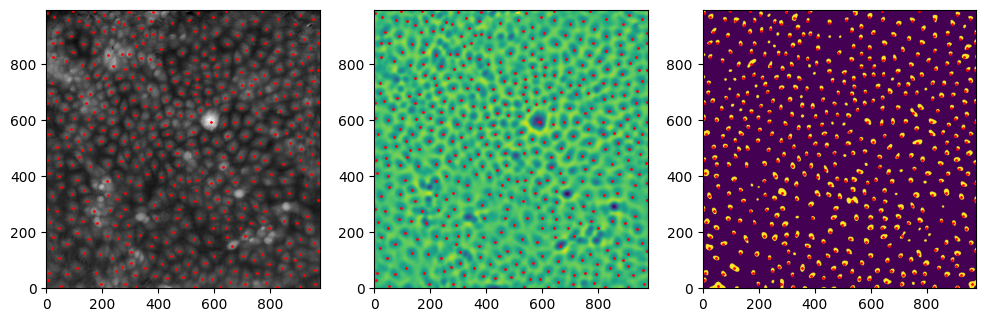

In [277]:
H_tmp = 0.05

hmin = extendedmin(-n_gauss, H_tmp)
pos_idx = find_cell_pos(-n_gauss, H_tmp, min_size=100)

fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(im[idx].T, cmap="gray", origin="lower", vmin=0)
ax[0].plot(*pos_idx.T, 'r.', ms=2)

ax[1].imshow(-n_gauss.T, origin="lower")
ax[1].plot(*pos_idx.T, 'r.', ms=2)

ax[2].imshow(hmin.T, origin="lower")
ax[2].plot(*pos_idx.T, 'r.', ms=2)

print(len(pos_idx))

11.459155902616464
597


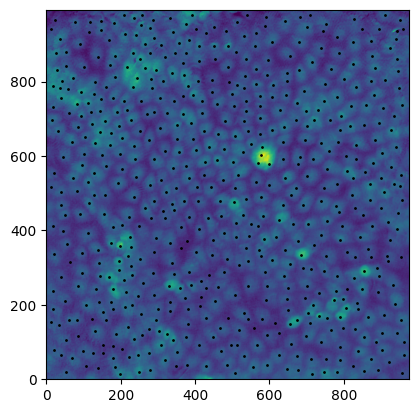

In [274]:
from skimage.filters import laplace, gaussian, threshold_otsu
from skimage.feature import peak_local_max
import scipy as sc

particle_size = 12
gaussian_kernel = particle_size**2/2/(2*np.pi)
print(gaussian_kernel)

n_low_pass  = gaussian(im[idx], s_high_tmp)
n_high_pass = gaussian(im[idx], s_low_tmp)
n_norm = n_low_pass - n_high_pass

gauss = gaussian(im[idx],gaussian_kernel)
lap = laplace(n_gauss,ksize=10)
coordinates = peak_local_max(lap, min_distance=particle_size)

plt.figure()
plt.imshow(lap.T, origin="lower")
plt.imshow(im[idx].T, origin="lower")


# plt.plot(*pos_idx.T, 'r.', ms=4)
plt.plot(coordinates[:, 0], coordinates[:, 1], 'k.', ms=2)

#plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.', ms=2)

print(len(coordinates))

In [278]:
ksize = 10
psize = 12

particle_size = 7
gaussian_kernel = particle_size**2/2/(2*np.pi)
print(gaussian_kernel)


3.8992961057514357


[Text(0.5, 1.0, '451')]

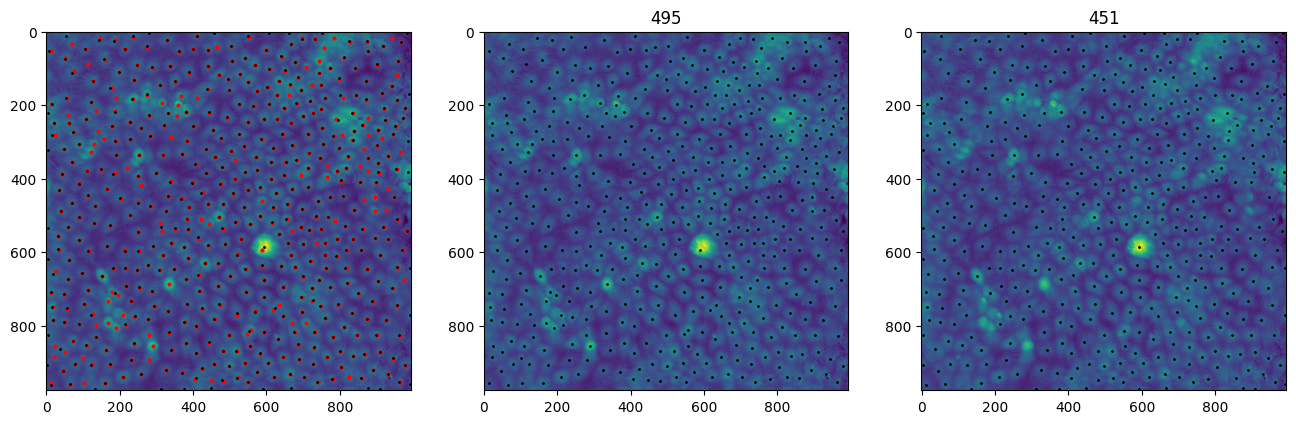

In [279]:
psize = 11
n_low_pass  = gaussian(im[idx], 7)
n_high_pass = gaussian(im[idx], 12)
n_norm = n_low_pass - n_high_pass



pos1 = peak_local_max(n_norm, min_distance=psize)
H_tmp = 0.06
hmin = extendedmin(-n_gauss, H_tmp)
pos2 = find_cell_pos(-n_gauss, H_tmp, min_size=100)



fig, ax = plt.subplots(1,3, figsize=(16,10))
ax[0].imshow(im[idx])
ax[1].imshow(im[idx])#lap1)
ax[2].imshow(im[idx])#lap3)

ax[0].plot(pos1[:, 1], pos1[:, 0], 'r.', ms=4)
ax[0].plot(pos2[:,1], pos2[:,0], 'k.', ms=2)

ax[1].plot(pos1[:, 1], pos1[:, 0], 'k.', ms=2)
ax[2].plot(pos2[:,1], pos2[:,0], 'k.', ms=2)

ax[1].set(title=len(pos1))
ax[2].set(title=len(pos2))

In [ ]:
new_pos = []
wrong_pos = []
for x, y in pos_idx:
    if im[idx, x, y] < 1.33:
        wrong_pos.append([int(x), int(y)])
        continue
    else:
        new_pos.append([int(x), int(y)])

new_pos = np.array(new_pos)
wrong_pos = np.array(wrong_pos)

In [130]:
500 / 0.567**2

1555.2631660803327